In [1]:
import pandas as pd
import json

In [11]:
df_queue = pd.read_json("./single_request_with_queue.json", lines=True)

In [3]:
def filter_df(x):
    return x['metric'] == 'completion_time' and 'tags' in x['data']

In [57]:
df_q_completion = df_queue[df_queue.apply(filter_df, axis=1)]

In [58]:
df_q_completion['start'] = df_q_completion.apply(lambda x: x['data']['tags']['start'], axis=1)
df_q_completion['start_success'] = df_q_completion.apply(lambda x: x['data']['tags']['startSuccess'], axis=1)
df_q_completion['end'] = df_q_completion.apply(lambda x: x['data']['tags']['end'], axis=1)
df_q_completion['vu'] = df_q_completion.apply(lambda x: x['data']['tags']['vu'], axis=1)

<ipython-input-58-5b100cec62cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start'] = df_q_completion.apply(lambda x: x['data']['tags']['start'], axis=1)
<ipython-input-58-5b100cec62cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start_success'] = df_q_completion.apply(lambda x: x['data']['tags']['startSuccess'], axis=1)
<ipython-input-58-5b100cec62cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [59]:
df_q_completion

,type,data,metric,start,start_success,end,vu
29,Point,"{'time': '2021-04-22T16:13:11.926433+07:00', '...",completion_time,1619082791360,1619082791360,1619082791925,50
44,Point,"{'time': '2021-04-22T16:13:12.16269+07:00', 'v...",completion_time,1619082791359,1619082791359,1619082792160,14
58,Point,"{'time': '2021-04-22T16:13:12.172125+07:00', '...",completion_time,1619082791362,1619082791362,1619082792171,1303
130,Point,"{'time': '2021-04-22T16:13:12.324357+07:00', '...",completion_time,1619082791349,1619082791349,1619082792323,6
650,Point,"{'time': '2021-04-22T16:13:13.486349+07:00', '...",completion_time,1619082791364,1619082791364,1619082793485,55
...,...,...,...,...,...,...,...
96796,Point,"{'time': '2021-04-22T16:14:22.227951+07:00', '...",completion_time,1619082794995,1619082857517,1619082862227,1802
96812,Point,"{'time': '2021-04-22T16:14:22.248526+07:00', '...",completion_time,1619082794992,1619082857513,1619082862248,1801
96826,Point,"{'time': '2021-04-22T16:14:22.255954+07:00', '...",completion_time,1619082794674,1619082857515,1619082862255,1432
96840,Point,"{'time': '2021-04-22T16:14:22.274994+07:00', '...",completion_time,1619082794693,1619082857519,1619082862274,1261


In [60]:
min_start = df_q_completion['start'].min()
min_start

'1619082791348'

In [61]:
df_q_completion['start'] = df_q_completion['start'].apply(lambda x: int(x) - int(min_start))
df_q_completion['start_success'] = df_q_completion['start_success'].apply(lambda x: int(x) - int(min_start))
df_q_completion['end'] = df_q_completion['end'].apply(lambda x: int(x) - int(min_start))

<ipython-input-61-98c94dffd5de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start'] = df_q_completion['start'].apply(lambda x: int(x) - int(min_start))
<ipython-input-61-98c94dffd5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_completion['start_success'] = df_q_completion['start_success'].apply(lambda x: int(x) - int(min_start))
<ipython-input-61-98c94dffd5de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [62]:
df_q_completion

,type,data,metric,start,start_success,end,vu
29,Point,"{'time': '2021-04-22T16:13:11.926433+07:00', '...",completion_time,12,12,577,50
44,Point,"{'time': '2021-04-22T16:13:12.16269+07:00', 'v...",completion_time,11,11,812,14
58,Point,"{'time': '2021-04-22T16:13:12.172125+07:00', '...",completion_time,14,14,823,1303
130,Point,"{'time': '2021-04-22T16:13:12.324357+07:00', '...",completion_time,1,1,975,6
650,Point,"{'time': '2021-04-22T16:13:13.486349+07:00', '...",completion_time,16,16,2137,55
...,...,...,...,...,...,...,...
96796,Point,"{'time': '2021-04-22T16:14:22.227951+07:00', '...",completion_time,3647,66169,70879,1802
96812,Point,"{'time': '2021-04-22T16:14:22.248526+07:00', '...",completion_time,3644,66165,70900,1801
96826,Point,"{'time': '2021-04-22T16:14:22.255954+07:00', '...",completion_time,3326,66167,70907,1432
96840,Point,"{'time': '2021-04-22T16:14:22.274994+07:00', '...",completion_time,3345,66171,70926,1261


In [202]:
df_sampled = df_q_completion[:200] #.sample(n=100)

In [203]:
df_sampled_sorted = df_sampled.sort_values(by='start', ascending=False)

<BarContainer object of 200 artists>

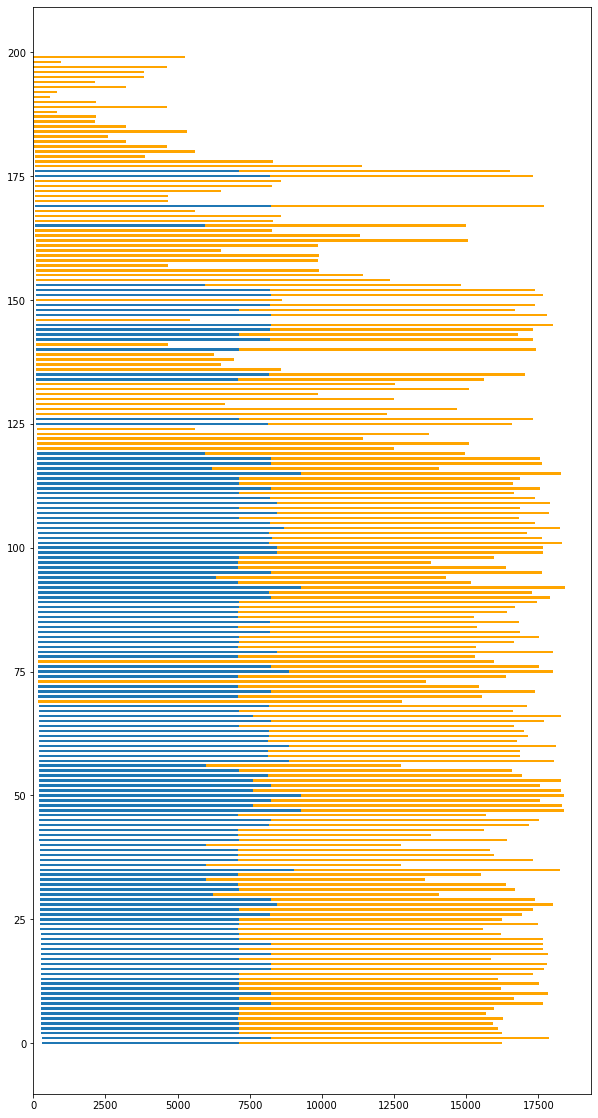

In [204]:
import matplotlib.pyplot as plt
import numpy as np


target_bars_start = df_sampled_sorted['start']
target_bars_start_success = df_sampled_sorted['start_success']
target_bars_end = df_sampled_sorted['end']
N = len(target_bars_end)
ind = np.arange(N)

plt.subplots(figsize=(10, 20))
plt.barh(ind, target_bars_end, 0.5, color='orange')
plt.barh(ind, target_bars_start_success, 0.5)
plt.barh(ind, target_bars_start, 0.5, color='white')